In [1]:
#pandas libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%run "../notebooks/cargar_df.ipynb"

In [2]:
train = get_train()

In [3]:
test = get_test()

In [4]:
train.head().T

,0,1,2,3,4
ID,27761,27760,27446,16808,16805
Region,EMEA,EMEA,Americas,Americas,Americas
Territory,None,None,NW America,NW America,NW America
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1
Bureaucratic_Code_0_Approved,1,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,2015-06-16 00:00:00,2015-06-16 00:00:00,2015-04-21 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00
Source,None,None,Source_7,Source_11,Source_11


In [5]:
test.head().T

,0,1,2,3,4
ID,6140,6146,6151,6118,6124
Region,EMEA,EMEA,EMEA,EMEA,EMEA
Territory,Germany,Germany,Germany,Germany,Germany
"Pricing, Delivery_Terms_Quote_Appr",1,1,1,1,1
"Pricing, Delivery_Terms_Approved",1,1,1,1,1
Bureaucratic_Code_0_Approval,1,1,1,1,1
Bureaucratic_Code_0_Approved,1,1,1,1,1
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4
Account_Created_Date,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00
Source,Source_7,Source_7,Source_7,Source_7,Source_7


In [6]:
train = train[train.Stage.isin(['Closed Won', 'Closed Lost'])].copy()
train.shape

(16883, 47)

In [7]:
train.Stage.value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

In [8]:
# Me quedo con los registros con la oportunidad terminada
train.Stage.replace({'Closed Won': 1, 'Closed Lost': 0}, inplace=True)

In [9]:
train.Stage.value_counts()

1    9533
0    7350
Name: Stage, dtype: int64

In [10]:
print('Cantidad de opportunity_id de train:',train.Opportunity_ID.nunique())
print('Cantidad de opportunity_id de test:',test.Opportunity_ID.nunique())

Cantidad de opportunity_id de train: 9791
Cantidad de opportunity_id de test: 1567


In [11]:
# Junto el set de train y test en un nuevo data frame data
data = pd.concat([train.drop('Stage', axis=1), test])
data

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,2016-05-01,2016-06-30,2016-05-01,Q2,2016,10,EUR,5272800.0,EUR,5272800.0
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,2016-01-18,2016-01-20,2016-01-01,Q1,2016,0,EUR,48230.0,EUR,48230.0
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-25,2016-01-25,2016-01-01,Q1,2016,0,USD,83865.6,USD,83865.6
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,2018-03-31,2018-02-01,Q1,2018,14,USD,7421881.5,USD,7421881.5
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-01,2018-02-28,2018-02-01,Q1,2018,25,USD,13357192.5,USD,13357192.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,16345,EMEA,KSA,1,1,0,0,Bureaucratic_Code_4,2017-06-12,Source_3,...,2019-05-01,2019-05-10,2019-05-01,Q2,2019,0,USD,124740.0,USD,147750.0
2547,15218,Americas,SE America,1,1,0,0,Bureaucratic_Code_4,2018-06-08,None,...,2019-10-01,2019-12-31,2019-10-01,Q4,2019,0,USD,45054.9,USD,45054.9
2548,15224,Americas,SE America,1,1,1,1,Bureaucratic_Code_4,2018-06-08,None,...,2019-10-01,2019-12-31,2019-10-01,Q4,2019,0,USD,100122.0,USD,100122.0
2549,7286,Americas,NE America,1,1,0,0,Bureaucratic_Code_4,2018-08-29,None,...,2019-08-01,2019-08-01,2019-08-01,Q3,2019,0,USD,143220.0,USD,143220.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19434 entries, 0 to 2550
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  19434 non-null  int16         
 1   Region                              19434 non-null  category      
 2   Territory                           19434 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  19434 non-null  int16         
 4   Pricing, Delivery_Terms_Approved    19434 non-null  int16         
 5   Bureaucratic_Code_0_Approval        19434 non-null  category      
 6   Bureaucratic_Code_0_Approved        19434 non-null  category      
 7   Bureaucratic_Code                   19434 non-null  object        
 8   Account_Created_Date                19434 non-null  datetime64[ns]
 9   Source                              19434 non-null  object        
 10  Billing_Country        

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Pricing, Delivery_Terms_Quote_Appr'}>,
        <AxesSubplot:title={'center':'Pricing, Delivery_Terms_Approved'}>],
       [<AxesSubplot:title={'center':'Opportunity_ID'}>,
        <AxesSubplot:title={'center':'ASP'}>,
        <AxesSubplot:title={'center':'ASP_(converted)'}>],
       [<AxesSubplot:title={'center':'Delivery_Year'}>,
        <AxesSubplot:title={'center':'TRF'}>,
        <AxesSubplot:title={'center':'Total_Amount'}>],
       [<AxesSubplot:title={'center':'Total_Taxable_Amount'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

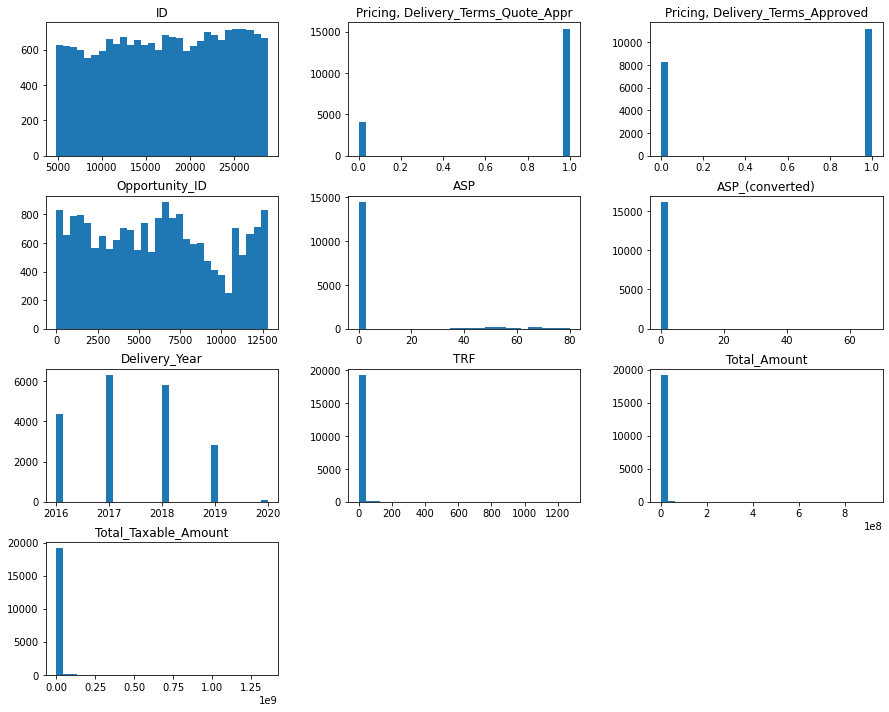

In [13]:
data.hist(grid=False, figsize=(15, 12), bins=30)

In [14]:
sesgos = data.agg('skew').transpose()
sesgos.columns = 'sesgo'
sesgos

ID                                    -0.063734
Pricing, Delivery_Terms_Quote_Appr    -1.423385
Pricing, Delivery_Terms_Approved      -0.308454
Opportunity_ID                         0.127412
ASP                                    2.824053
ASP_(converted)                       74.605280
Delivery_Year                          0.157183
TRF                                   38.109246
Total_Amount                          35.329680
Total_Taxable_Amount                  33.095981
dtype: float64

Text(0, 0.5, 'Cantidad')

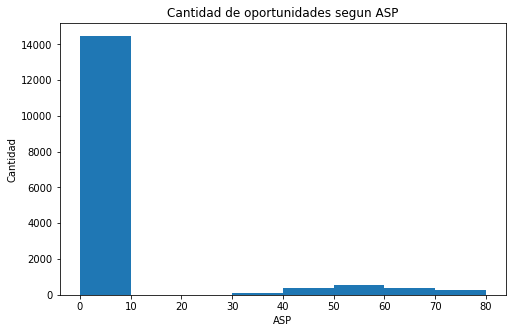

In [15]:
gr = data.ASP.hist(grid=False, figsize=(8, 5), bins=8)
gr.set_title('Cantidad de oportunidades segun ASP')
gr.set_xlabel('ASP')
gr.set_ylabel('Cantidad')

Se nota por el grafico que la mayoria de los registros tienen el asp entre 0 y 10, por lo cual tomo los otros como outliers

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASP', ylabel='Density'>

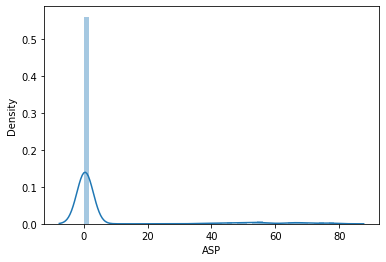

In [16]:
sns.distplot(data.ASP)

In [17]:
print('Mean:', data.ASP.mean())
print('Median:', data.ASP.median())
print('Mode:', data.ASP.mode())

Mean: 6.296691954663694
Median: 0.395
Mode: 0    0.38
dtype: float64


In [18]:
df = data.ASP.agg(lambda x: np.log(x+1))
df

0       0.418710
1       0.425268
2       0.392042
3       0.425268
4       0.425268
          ...   
2546    0.262364
2547    0.343590
2548    0.343590
2549    0.405465
2550    0.254642
Name: ASP, Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASP', ylabel='Density'>

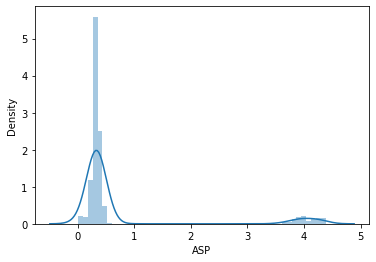

In [19]:
sns.distplot(df)

In [20]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 0.7115875537972725
Median: 0.33289441527332897
Mode: 0    0.322083
dtype: float64


In [21]:
df.skew()

2.594207980315695

In [22]:
df = data.ASP.agg(np.sqrt)
df

0       0.721110
1       0.728011
2       0.692820
3       0.728011
4       0.728011
          ...   
2546    0.547723
2547    0.640312
2548    0.640312
2549    0.707107
2550    0.538516
Name: ASP, Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASP', ylabel='Density'>

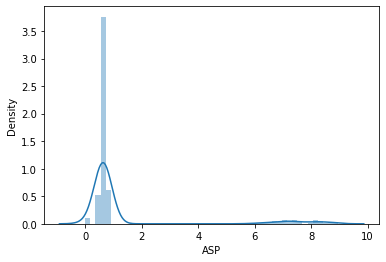

In [23]:
sns.distplot(df)

In [24]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 1.330537291193393
Median: 0.6284902544988268
Mode: 0    0.616441
dtype: float64


In [25]:
df.skew()

2.6559047280127235

In [26]:
df = data.ASP.agg(lambda x: 1/(x+1))
df

0       0.657895
1       0.653595
2       0.675676
3       0.653595
4       0.653595
          ...   
2546    0.769231
2547    0.709220
2548    0.709220
2549    0.666667
2550    0.775194
Name: ASP, Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASP', ylabel='Density'>

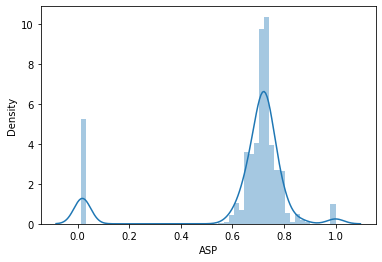

In [27]:
sns.distplot(df)

In [28]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 0.651093000498163
Median: 0.7168458781362007
Mode: 0    0.724638
dtype: float64


In [29]:
df.skew()

-2.2236948682814854

La mejor transformacion resulto ser 1/x

In [30]:
data.ASP.mean()

6.296691954663694

In [31]:
# Elimino los outliers, cambiandolos por el promedio del resto
(data.ASP <= 10).sum()

14473

In [32]:
(data.ASP > 10).sum()

1673

In [33]:
data_asp_mean = data[data.ASP <= 10].ASP.mean()
outliers =  data.ASP <= 10
data.ASP = data.ASP.where(outliers, data_asp_mean)

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Densidad de ASP')

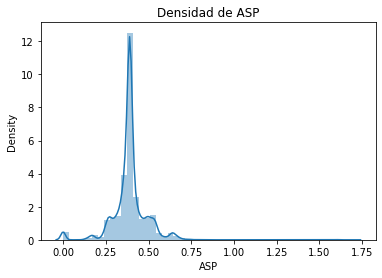

In [34]:
sns.distplot(data.ASP).set_title('Densidad de ASP')

In [35]:
print('Mean:', data.ASP.mean())
print('Median:', data.ASP.median())
print('Mode:', data.ASP.mode())

Mean: 0.39033982588267807
Median: 0.39033982588267807
Mode: 0    0.39034
dtype: float64


In [36]:
data.ASP.skew()

0.1722332720240019

Reduzco el sesgo de la columna ASP converted

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Densidad de ASP Converted')

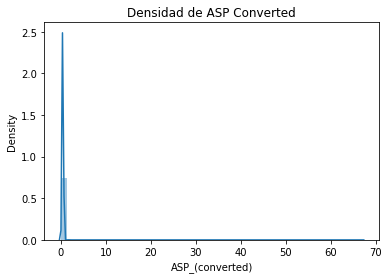

In [37]:
sns.distplot(data['ASP_(converted)']).set_title('Densidad de ASP Converted')

In [38]:
data['ASP_(converted)'].mean()

0.4238507766629505

In [39]:
# Elimino los outliers, cambiandolos por el promedio del resto
(data['ASP_(converted)'] <= 5).sum()

16143

In [40]:
(data['ASP_(converted)'] > 10).sum()

3

In [41]:
data['ASP_(converted)'].nlargest(15)

2200     67.00000
2179     57.68578
1333     40.71938
16114     1.70000
16117     1.60000
16118     1.60000
16119     1.60000
16120     1.60000
16121     1.60000
16122     1.60000
9222      1.00000
2524      0.90488
1468      0.78000
2536      0.76000
16143     0.75000
Name: ASP_(converted), dtype: float64

In [42]:
# Cambio esos 3 outliers por el promedio del resto de la columna
data_asp_mean = data[data['ASP_(converted)'] <= 10]['ASP_(converted)'].mean()
outliers =  data['ASP_(converted)'] <= 10
data['ASP_(converted)'] = data['ASP_(converted)'].where(outliers, data_asp_mean)

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Densidad de ASP Converted')

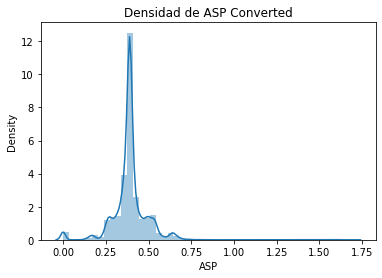

In [43]:
sns.distplot(data.ASP).set_title('Densidad de ASP Converted')

In [44]:
print('Mean:', data['ASP_(converted)'].mean())
print('Median:', data['ASP_(converted)'].median())
print('Mode:', data['ASP_(converted)'].mode())

Mean: 0.4136832980239112
Median: 0.4136832980239113
Mode: 0    0.413683
dtype: float64


In [45]:
data['ASP_(converted)'].skew()

0.055430425567801825

Hago lo mismo con Total Amount

In [46]:
# Del Tp1

# https://data.oecd.org/conversion/exchange-rates.htm
price_usd_convertion_by_year = {
    'EUR': {2016: 0.940, 2017: 0.923, 2018: 0.848, 2019: 0.893, 2020: 0.860},
    'JPY': {2016: 113.138, 2017: 116.667, 2018: 110.424, 2019: 109.008, 2020: 104.66},
    'AUD': {2016: 1.400, 2017: 1.358, 2018: 1.340, 2019: 1.439, 2020: 1.420},
    'GBP': {2016: 0.770, 2017: 0.808, 2018: 0.750, 2019: 0.784, 2020: 0.770},
    'USD': {2016: 1, 2017: 1, 2018: 1, 2019: 1, 2020: 1}
}

def get_convertion_usd(x):
    currency = x['Total_Amount_Currency']
    year = pd.to_datetime(x['Month']).year
    return price_usd_convertion_by_year[currency][year]
    
data['Total_Amount_USD'] = data['Total_Amount'] / data.apply(lambda x: get_convertion_usd(x), axis=1)

data['Total_Amount_USD'].head()

0    5.609362e+06
1    5.130851e+04
2    8.386560e+04
3    7.421882e+06
4    1.335719e+07
Name: Total_Amount_USD, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Amount_USD', ylabel='Density'>

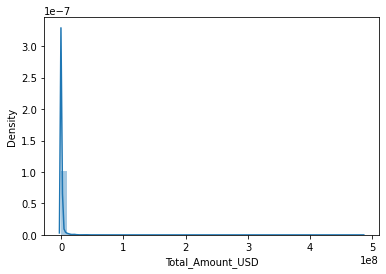

In [47]:
sns.distplot(data.Total_Amount_USD)

In [48]:
print('Mean:', data.Total_Amount_USD.mean())
print('Median:', data.Total_Amount_USD.median())
print('Mode:', data.Total_Amount_USD.mode())

Mean: 986863.2919461648
Median: 79773.83531960996
Mode: 0    54.800332
dtype: float64


In [49]:
data.Total_Amount_USD.skew()

34.85875841366481

In [50]:
df = data.Total_Amount_USD.agg(lambda x: np.log(x+1))
df

0       15.539948
1       10.845631
2       11.336983
3       15.819943
4       16.407566
          ...    
2546    11.733995
2547    10.715659
2548    11.514155
2549    11.872144
2550    13.790591
Name: Total_Amount_USD, Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Amount_USD', ylabel='Density'>

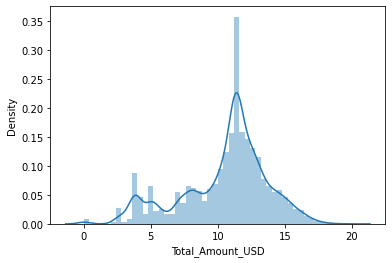

In [51]:
sns.distplot(df)

In [52]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 10.538875858774457
Median: 11.286963386833564
Mode: 0    4.02178
dtype: float64


In [53]:
df.skew()

-0.6921582865658048

In [54]:
df = data.Total_Amount_USD.agg(np.sqrt)
df

0       2368.409108
1        226.513820
2        289.595580
3       2724.313033
4       3654.749307
           ...     
2546     353.185504
2547     212.261395
2548     316.420606
2549     378.444183
2550     987.616947
Name: Total_Amount_USD, Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Amount_USD', ylabel='Density'>

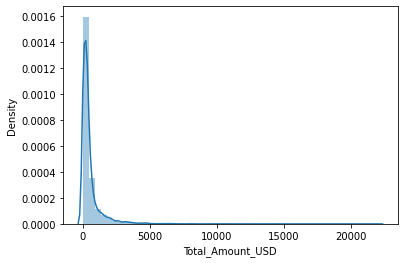

In [55]:
sns.distplot(df)

In [56]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 506.8985919121847
Median: 282.4426230575158
Mode: 0    7.402725
dtype: float64


In [57]:
df.skew()

5.88884974914474

In [58]:
df = data.Total_Amount_USD.agg(lambda x: 1/(x+1))
df

0       1.782734e-07
1       1.948956e-05
2       1.192370e-05
3       1.347367e-07
4       7.486603e-08
            ...     
2546    8.016610e-06
2547    2.219465e-05
2548    9.987715e-06
2549    6.982216e-06
2550    1.025233e-06
Name: Total_Amount_USD, Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Amount_USD', ylabel='Density'>

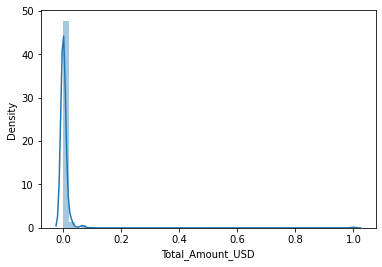

In [59]:
sns.distplot(df)

In [60]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 0.005989111272874352
Median: 1.2535281282544792e-05
Mode: 0    0.017921
dtype: float64


In [61]:
df.skew()

16.36264755102345

La mejor transformacion para Total_Amount_USD es la logaritmica

In [62]:
df = data.TRF
df

0       10
1        0
2        0
3       14
4       25
        ..
2546     0
2547     0
2548     0
2549     0
2550     3
Name: TRF, Length: 19434, dtype: int64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TRF', ylabel='Density'>

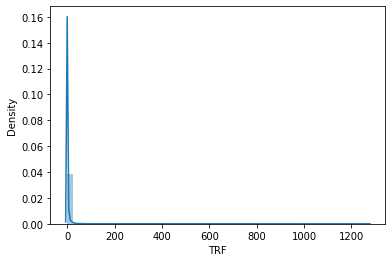

In [63]:
sns.distplot(df)

In [64]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 2.3529896058454254
Median: 0.0
Mode: 0    0
dtype: int64


In [65]:
df.skew()

38.10924620952118

In [66]:
data.TRF.value_counts()

0      13648
1       2673
2        723
3        396
5        327
       ...  
195        1
163        1
105        1
122        1
39         1
Name: TRF, Length: 107, dtype: int64

#### Me fijo la distribucion del feature dias activos

In [72]:
# Calculo la cantidad de dias activos que tuvo cada oportunidad
active_days = data['Last_Modified_Date'] - data['Opportunity_Created_Date']

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Dias'), Text(0, 0.5, 'Densidad')]

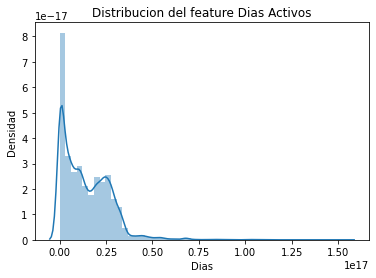

In [87]:
v = sns.distplot(active_days)
v.set_title('Distribucion del feature Dias Activos')
v.set(xlabel='Dias', ylabel='Densidad')

In [88]:
print('Mean:', active_days.mean())
print('Median:', active_days.median())
print('Mode:', active_days.mode())

Mean: 163 days 03:48:04.223525780
Median: 132 days 00:00:00
Mode: 0   0 days
dtype: timedelta64[ns]


In [90]:
active_days.dt.days.skew()

1.3837840616343215

In [92]:
df = active_days.dt.days.agg(lambda x: np.log(x+1))
df

0       5.247024
1       3.688879
2       5.693732
3       6.734592
4       6.734592
          ...   
2546    0.000000
2547    0.693147
2548    0.693147
2549    0.000000
2550    0.000000
Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Dias'), Text(0, 0.5, 'Densidad')]

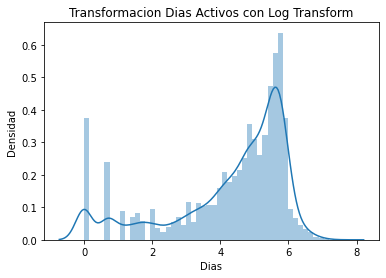

In [95]:
v = sns.distplot(df)
v.set_title('Transformacion Dias Activos con Log Transform')
v.set(xlabel='Dias', ylabel='Densidad')

In [96]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 4.290143533965015
Median: 4.890349128221754
Mode: 0    0.0
dtype: float64


In [97]:
df.skew()

-1.189002882346534

In [120]:
df = active_days.dt.days.agg(np.sqrt)
df

0       13.747727
1        6.244998
2       17.204651
3       28.982753
4       28.982753
          ...    
2546     0.000000
2547     1.000000
2548     1.000000
2549     0.000000
2550     0.000000
Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Dias'), Text(0, 0.5, 'Densidad')]

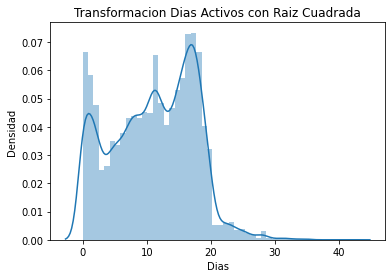

In [121]:
v = sns.distplot(df)
v.set_title('Transformacion Dias Activos con Raiz Cuadrada')
v.set(xlabel='Dias', ylabel='Densidad')

In [122]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 11.04944675610515
Median: 11.489125293076057
Mode: 0    0.0
dtype: float64


In [123]:
df.skew()

-0.04325363500804639

In [104]:
df = active_days.dt.days.agg(lambda x: 1/(x+1))
df

0       0.005263
1       0.025000
2       0.003367
3       0.001189
4       0.001189
          ...   
2546    1.000000
2547    0.500000
2548    0.500000
2549    1.000000
2550    1.000000
Length: 19434, dtype: float64

/home/cecilia/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

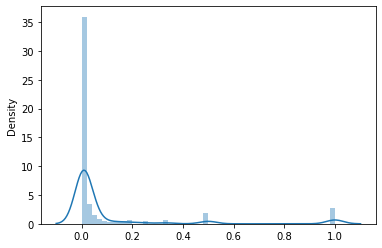

In [105]:
sns.distplot(df)

In [106]:
print('Mean:', df.mean())
print('Median:', df.median())
print('Mode:', df.mode())

Mean: 0.09768238649433206
Median: 0.007518796992481203
Mode: 0    1.0
dtype: float64


In [107]:
df.skew()

3.0114410564096983

Aunque para el feature active days tiene menos sesgo la transformacion utilizando su raiz cuadrada, mejor fue el resultado de la transformacion logaritmica

In [ ]:
# Juntando todo

# Elimino los outliers de las columnas ASP y ASP_Converted
data_asp_mean = data[data.ASP <= 10].ASP.mean()
outliers =  data.ASP <= 10
data.ASP = data.ASP.where(outliers, data_asp_mean)

data_asp_mean = data[data['ASP_(converted)'] <= 10]['ASP_(converted)'].mean()
outliers =  data['ASP_(converted)'] <= 10
data['ASP_(converted)'] = data['ASP_(converted)'].where(outliers, data_asp_mean)


# Del Tp1

# https://data.oecd.org/conversion/exchange-rates.htm
price_usd_convertion_by_year = {
    'EUR': {2016: 0.940, 2017: 0.923, 2018: 0.848, 2019: 0.893, 2020: 0.860},
    'JPY': {2016: 113.138, 2017: 116.667, 2018: 110.424, 2019: 109.008, 2020: 104.66},
    'AUD': {2016: 1.400, 2017: 1.358, 2018: 1.340, 2019: 1.439, 2020: 1.420},
    'GBP': {2016: 0.770, 2017: 0.808, 2018: 0.750, 2019: 0.784, 2020: 0.770},
    'USD': {2016: 1, 2017: 1, 2018: 1, 2019: 1, 2020: 1}
}

def get_convertion_usd(x):
    currency = x['Total_Amount_Currency']
    year = pd.to_datetime(x['Month']).year
    return price_usd_convertion_by_year[currency][year]
    
data['Total_Amount_USD'] = data['Total_Amount'] / data.apply(lambda x: get_convertion_usd(x), axis=1)

data['Total_Amount_USD'] = data['Total_Amount_USD'].agg(lambda x: np.log(x+1))
data['active_days'] = data['active_days'].agg(lambda x: np.log(x+1))
